In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# retrieve random images of handwritten numbers from MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# use the first 500 images 
m = 500
x_train = x_train[:m]
y_train = y_train[:m]
x_test = x_test[:m]
y_test = y_test[:m]

# since the neural network is a binary classifier, need to set all non 8s as zeros and all 8s as one 
y_train[y_train!=8] = 0
y_train[y_train==8] = 1
y_test[y_test!=8] = 0
y_test[y_test==8] = 1

# reshape the training data
x_train = x_train.reshape( (m, 28**2) )
x_train = np.swapaxes(x_train,0,1)
y_train = y_train[np.newaxis, :]

x_test = x_test.reshape( (m, 28**2) )
x_test = np.swapaxes(x_test,0,1)
y_test = y_test[np.newaxis, :]


Since the neural network is currently only able to do binary classification, the model is trained to detect the number 8 in images. An example of an image of 8 from the MNIST database is shown below.

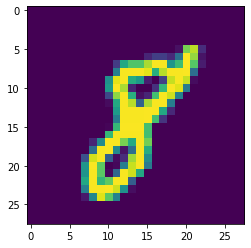

In [30]:
# example of a handwritten 8
plt.imshow(x_train[:,17].reshape(28,28))
plt.show()

In [40]:
%load_ext autoreload
%autoreload 2
from dnn import BinaryModel

# note that the model includes dropout as a regularization, where keep_prob=0.75 implies that a quarter of the nodes
# are dropped out for each iteration
ml = BinaryModel(x_train, y_train,  layer_dims = [28, 28, 1], keep_prob=0.75, alpha=0.005, iter_=20000)
ml.train()

train_pred = ml.get_training_prediction()
print ('Training Accuracy: ', (np.mean(y_train[0] == train_pred[0]) ))

# test the DNN model on other images not used in the training dataset
test_pred = ml.classify(x_test)
print ('Testing Accuracy: ', (np.mean(y_test[0] == test_pred[0]) ))


  0%|          | 39/20000 [00:00<00:51, 388.33it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
learning rate = 0.005
number of iterations = 20000


100%|██████████| 20000/20000 [00:38<00:00, 514.88it/s]

Training Accuracy:  1.0
Testing Accuracy:  0.936
